 ## Exploratory Data Analysis (EDA) ##

## Import Data ##

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("MEN_SHOES.csv")
data.head()

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
0,ASIAN,"2,242","₹1,098","Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8
1,ASIAN,240,₹674,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0
2,ASIAN,"16,662",₹588,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8
3,ASIAN,135,₹599,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0
4,Reebok,240,₹982,Men's Velocity Runner Lp Running Shoe,4.0


## Melihat Struktur Data ##

In [28]:
data.head()             # 5 baris pertama
data.tail()             # 5 baris terakhir
data.shape              # jumlah baris dan kolom
data.info()             # info tipe data & non-null
data.describe()         # statistik deskriptif untuk numerik
data.columns            # nama-nama kolom
data.dtypes             # tipe data per kolom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23940 entries, 0 to 23939
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Name       23940 non-null  object 
 1   How_Many_Sold    23940 non-null  object 
 2   Current_Price    23142 non-null  object 
 3   Product_details  23940 non-null  object 
 4   RATING           23940 non-null  float64
dtypes: float64(1), object(4)
memory usage: 935.3+ KB


Brand_Name          object
How_Many_Sold       object
Current_Price       object
Product_details     object
RATING             float64
dtype: object

## Visualisasi ##

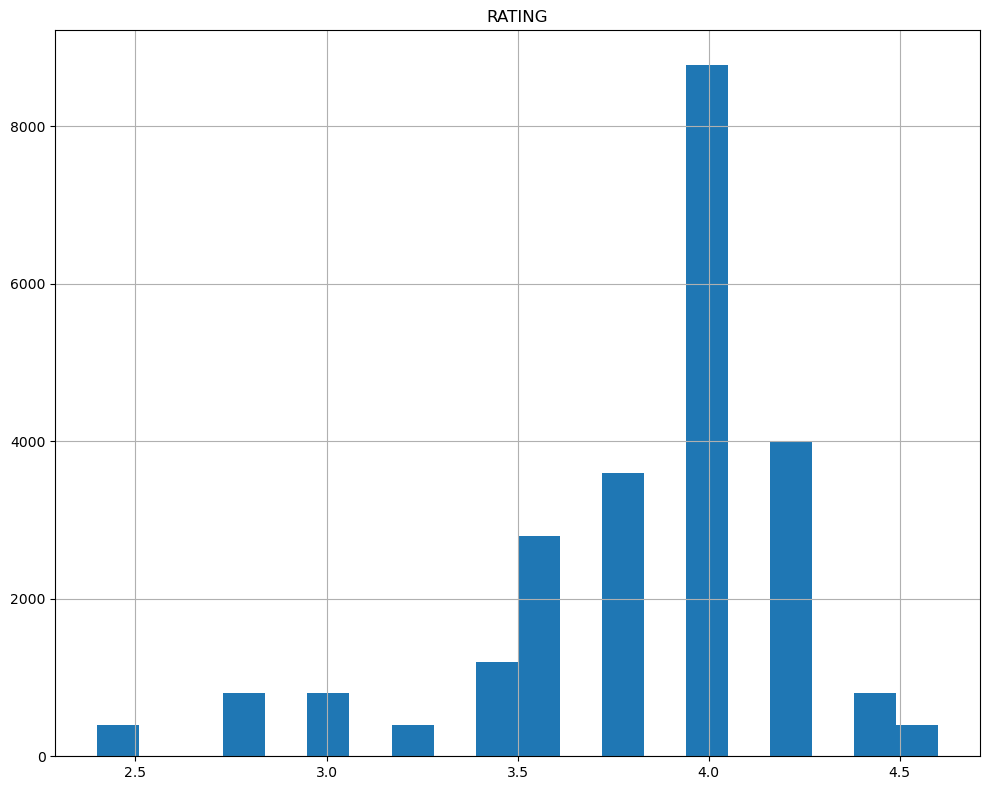

In [29]:
data.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()


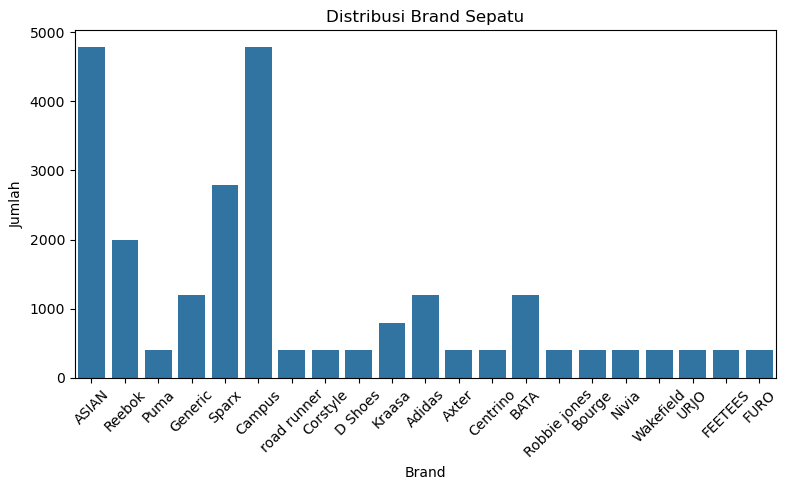

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Brand_Name', data=data)
plt.title("Distribusi Brand Sepatu")
plt.xlabel("Brand")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  Korelasi Fitur Numerik ##

In [31]:
data['How_Many_Sold'] = (
    data['How_Many_Sold']
    .astype(str)                       # ubah ke string dulu
    .str.replace(',', '', regex=False)
    .astype(float)                     # lalu ubah ke float
)


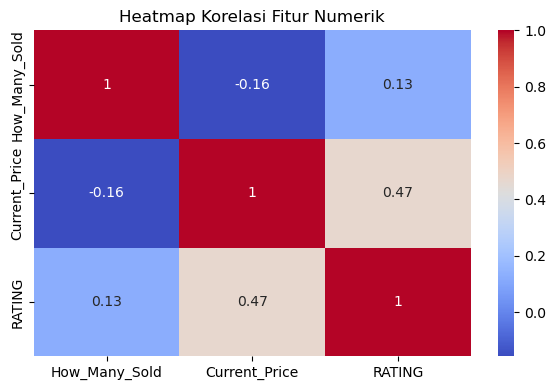

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bersihin koma ribuan dan simbol mata uang
data['How_Many_Sold'] = data['How_Many_Sold'].astype(str).str.replace(',', '').astype(float)
data['Current_Price'] = data['Current_Price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

# Pilih hanya kolom numerik untuk korelasi
X = data[['How_Many_Sold', 'Current_Price', 'RATING']]  # Sesuaikan jika perlu

# Buat heatmap korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur Numerik")
plt.tight_layout()
plt.show()


## Boxplot Harga berdasarkan Kategori ##

In [33]:
print(data.columns.tolist())


['Brand_Name', 'How_Many_Sold', 'Current_Price', 'Product_details', 'RATING']


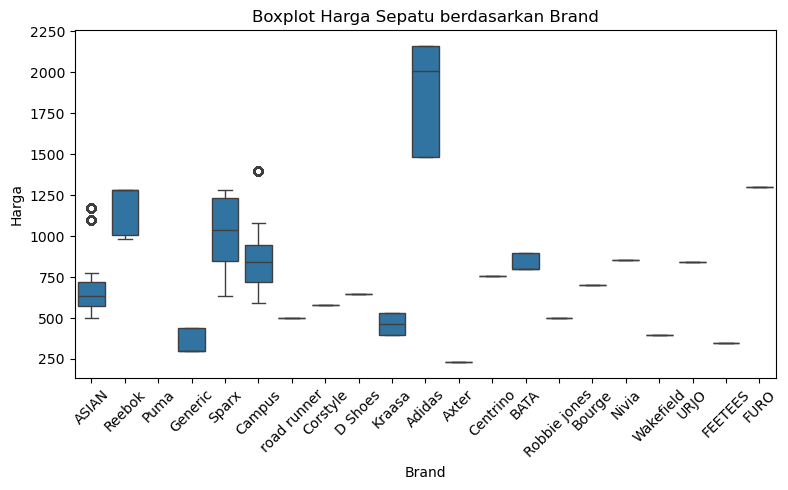

In [34]:
#boxplot harga sepatu berdasarkan brand
plt.figure(figsize=(8, 5))
sns.boxplot(x='Brand_Name', y='Current_Price', data=data)
plt.title("Boxplot Harga Sepatu berdasarkan Brand")
plt.xlabel("Brand")
plt.ylabel("Harga")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()